In [2]:
#importing all the libraries
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

In [3]:
#reading csv file(dataset)
df = pd.read_csv("SpamSet.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [4]:
#selecting columns that we need
df = df[["Body","Label"]]

In [5]:
df[df['Label']==1][['Body','Label']]

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...
4995,Subject: rock her world\n,1
4996,Subject: save your smoking\n unsubscribe\n tas...,1
4997,Subject: you can find unimaginable savings on ...,1
4998,Subject: floor heating under tile - easiest sy...,1


In [6]:
df.shape

(10000, 2)

In [7]:
#checking for null values
df.isnull().sum()

Body     0
Label    0
dtype: int64

In [8]:
#checking for duplicates
df.duplicated().sum()

313

In [9]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(9687, 2)

In [11]:
df['Label'].value_counts()

0    4927
1    4760
Name: Label, dtype: int64

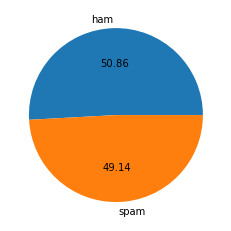

In [12]:
plt.pie(df['Label'].value_counts(), labels= ['ham','spam'], autopct ="%0.2f")
plt.show()

### Data processing
    #lower case
    #Tokenization
    #Removing special chars
    #Removing punctuation and stopwords
    #stemming

In [13]:
#importing porter stemmer for  stemming and making its object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [14]:
df.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [15]:
#cleaning and tokenization

def process_clean_body(text):
    
    #lowercase
    text = text.lower()
    
    #punctuation removal
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc).split()
    
    #removing stopwords and tokenization of it
    filtered_words = [ps.stem(word) for word in no_punc if word not in stopwords.words('english')]
    
    return filtered_words

In [ ]:
df['Transformed_Body'] = df['Body'].map(process_clean_body)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
#To install wordcloud i needed executable path
import sys
print(sys.executable)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 1200, height = 1000, min_font_size = 10, background_color = "white")

In [ ]:
spam_wc = wc.generate(df[df['Label'] == 1]['Body'].str.cat(sep = " "))

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)
plt.show()

In [ ]:
ham_wc = wc.generate(df[df['Label'] == 0]['Body'].str.cat(sep = " "))

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)
plt.show()

In [ ]:
df['Transformed_Body']

In [ ]:
spam_corpus = []
for msg in df[df['Label'] == 1]['Transformed_Body']:
    for word in msg:
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
# Plotting the words with frequency which are repeatedly used in case of spam for visualization
import seaborn as sns
from collections import Counter
x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x,y)
plt.xticks(rotation ='vertical')
plt.xlabel('Repeated Words')
plt.ylabel('Times of repetition')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['Label'] == 0]['Transformed_Body']:
    for word in msg:
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
# Plotting the words with frequency which are repeatedly used in case of ham for visualization
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.xlabel('Repeated Words')
plt.ylabel('Times of repetition')
plt.show()

In [ ]:
#Adding columns we need for future use
df['num_words'] = df['Body'].str.split().str.len()

In [ ]:
df['num_chars'] = df['Body'].str.len()

#### Alternative way to sent_tokenize to word,sent, char counts
import nltk

#folder = nltk.data.find(dirpath)

#corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '.*\.txt')

#print "The number of sentences =", len(corpusReader.sents())

#print "The number of patagraphs =", len(corpusReader.paras())

#print "The number of words =", len([word for sentence in corpusReader.sents() for word in sentence])

#print "The number of characters =", len([char for sentence in corpusReader.sents() for word in sentence for char in word])

In [ ]:
#finding the nltk data path
nltk.data.path

In [ ]:
# Download punkt tokenizer
# import nltk
# nltk.download('punkt')

In [ ]:
df['num_sentences'] = df['Body'].apply(nltk.sent_tokenize).apply(len)

#### Text Vectorization Using BagOfWords

In [ ]:
df.head(5)

In [ ]:
#Transforming the data of Transformed_Message such that it can be fed into the model (matrix of tokens)
#(concept of bagOfWords)
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer = process_clean_body).fit_transform(df['Body'])

In [ ]:
#spliting the data into 80% train and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(messages_bow, df['Label'] == 1, test_size =.20, random_state = 0)

In [ ]:
messages_bow.shape

In [ ]:
#Create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, Y_train)

In [ ]:
#print the predicitons
print(classifier.predict(X_train))

#print the actual values
print(Y_train.values)


In [ ]:
#Evaluating the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(Y_train, pred))
print()
print('Confusion matrix: \n', confusion_matrix(Y_train, pred))
print()
print('Accuracy: ', accuracy_score(Y_train, pred))

In [ ]:
#print the predictions
print(classifier.predict(X_test))

#print the actual values
print(Y_test.values)

In [ ]:
#Evaluating the model on the test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(Y_test, pred))
print()
print('Confusion matrix: \n', confusion_matrix(Y_test, pred))
print()
print('Accuracy: ', accuracy_score(Y_test, pred))